<a href="https://colab.research.google.com/github/NagarkotiManish01/Deep-Learning/blob/main/deeplearning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Basics


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [ ]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6818 - loss: 0.5853
Epoch 1309/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.6818 - loss: 0.5852
Epoch 1310/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6818 - loss: 0.5852
Epoch 1311/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6818 - loss: 0.5851
Epoch 1312/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6818 - loss: 0.5851
Epoch 1313/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6818 - loss: 0.5850
Epoch 1314/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6818 - loss: 0.5850
Epoch 1315/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6818 - loss: 0.5849
Epoch 1316/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.5849
Epoch 1317/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5848
Epoch 1318/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6818 - loss

KeyboardInterrupt: 

In [9]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8333 - loss: 0.4081


[0.4081268608570099, 0.8333333134651184]

In [10]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [11]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.68905765],
       [0.41543263],
       [0.21367693],
       [0.5126498 ],
       [0.7056084 ],
       [0.793269  ]], dtype=float32)

In [12]:
y_test

,bought_insurance
2,1
10,0
21,0
11,0
14,1
9,1


In [ ]:
coef, intercept=model.get_weights()
coef, intercept

In [13]:
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))
sigmoid(-7)

0.0009110511944006454

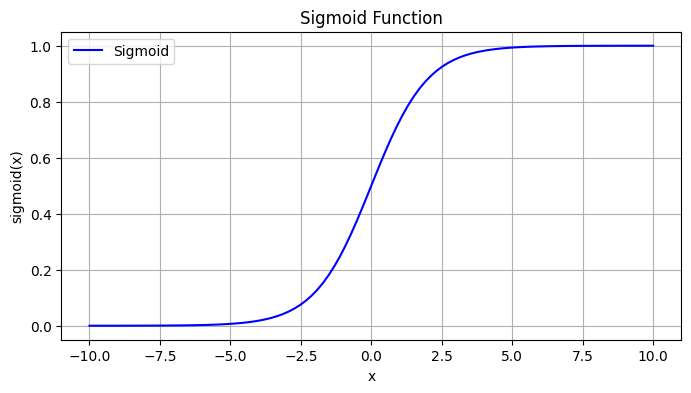

In [14]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)

# Compute y values
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()


In [15]:
def predictio_function(age,affordability):
  weighted_sum=coef[0]*age+coef[1]*affordability+intercept
  return sigmoid(weighted_sum)

In [16]:
def log_loss(y_true,y_predicted):
  epsilon=1e-15
  y_predicted_new=[max(i,epsilon) for i in y_predicted]
  y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new=np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [18]:
def sigmoid_numpy(X):
  # Corrected the typo from np.ecp to np.exp
  return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [19]:
import numpy as np
from sklearn.metrics import log_loss

def sigmoid_numpy(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent(age, affordability, y_true, epochs, loss_threshold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)

    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)

        loss = log_loss(y_true, y_predicted)

        w1d = (1 / n) * np.dot(age.T, (y_predicted - y_true))
        w2d = (1 / n) * np.dot(affordability.T, (y_predicted - y_true))
        bias_d = np.mean(y_predicted - y_true)

        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print(f'Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}')

        if loss <= loss_threshold:
            break


In [20]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000,0.4631)

Epoch: 0, w1: 0.974907633470177, w2: 0.948348125394529, bias: -0.11341867736368583, loss: 0.7113403233723417
Epoch: 1, w1: 0.9556229728273669, w2: 0.9058873696677865, bias: -0.2122349122718517, loss: 0.681264778737757
Epoch: 2, w1: 0.9416488476693794, w2: 0.8719790823960313, bias: -0.2977578997796538, loss: 0.6591474252715025
Epoch: 3, w1: 0.9323916996249162, w2: 0.8457541517722915, bias: -0.3715094724003511, loss: 0.6431523291301917
Epoch: 4, w1: 0.9272267472726993, w2: 0.8262362885332687, bias: -0.43506643026891584, loss: 0.6316873063379158
Epoch: 5, w1: 0.9255469396815343, w2: 0.8124402814952774, bias: -0.48994490058938817, loss: 0.623471707997592
Epoch: 6, w1: 0.9267936114129968, w2: 0.8034375029757677, bias: -0.5375299543522853, loss: 0.6175321183044205
Epoch: 7, w1: 0.93047170420295, w2: 0.7983920007454487, bias: -0.5790424270894963, loss: 0.6131591858705934
Epoch: 8, w1: 0.9361540784567942, w2: 0.7965748796787705, bias: -0.6155315088627655, loss: 0.6098518179750948
Epoch: 9, w1:

In [22]:
coef, intercept

NameError: name 'coef' is not defined